In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics  import classification_report , roc_curve , auc
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
Rawdata=pd.read_csv("C:\\Users\\priti\\Desktop\\Anand\\Analytics Vidhya\\Loan prediction\\train_ctrUa4K.csv")

In [3]:
Rawdata.head(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
Rawdata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
Rawdata.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
Rawdata.shape

(614, 13)

In [7]:
Rawdata.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
Rawdata.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
Rawdata.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

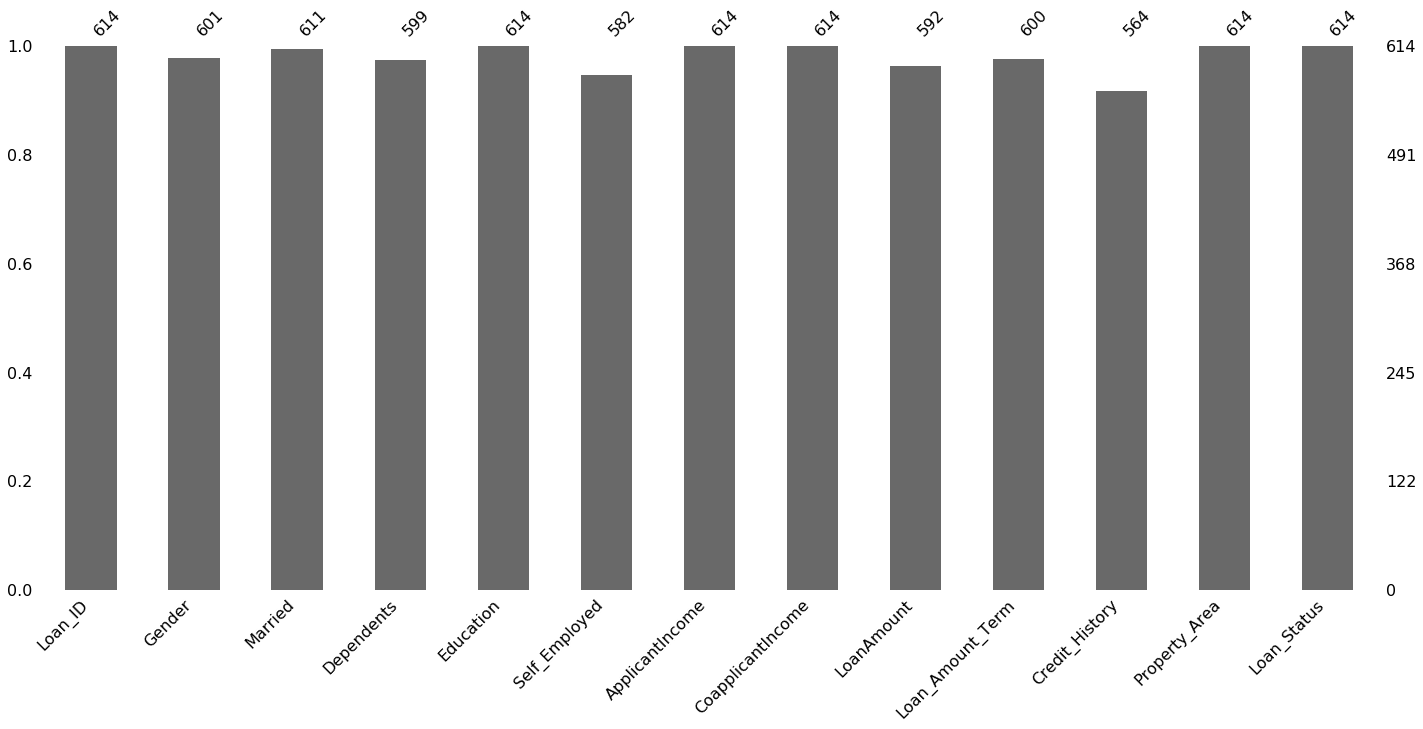

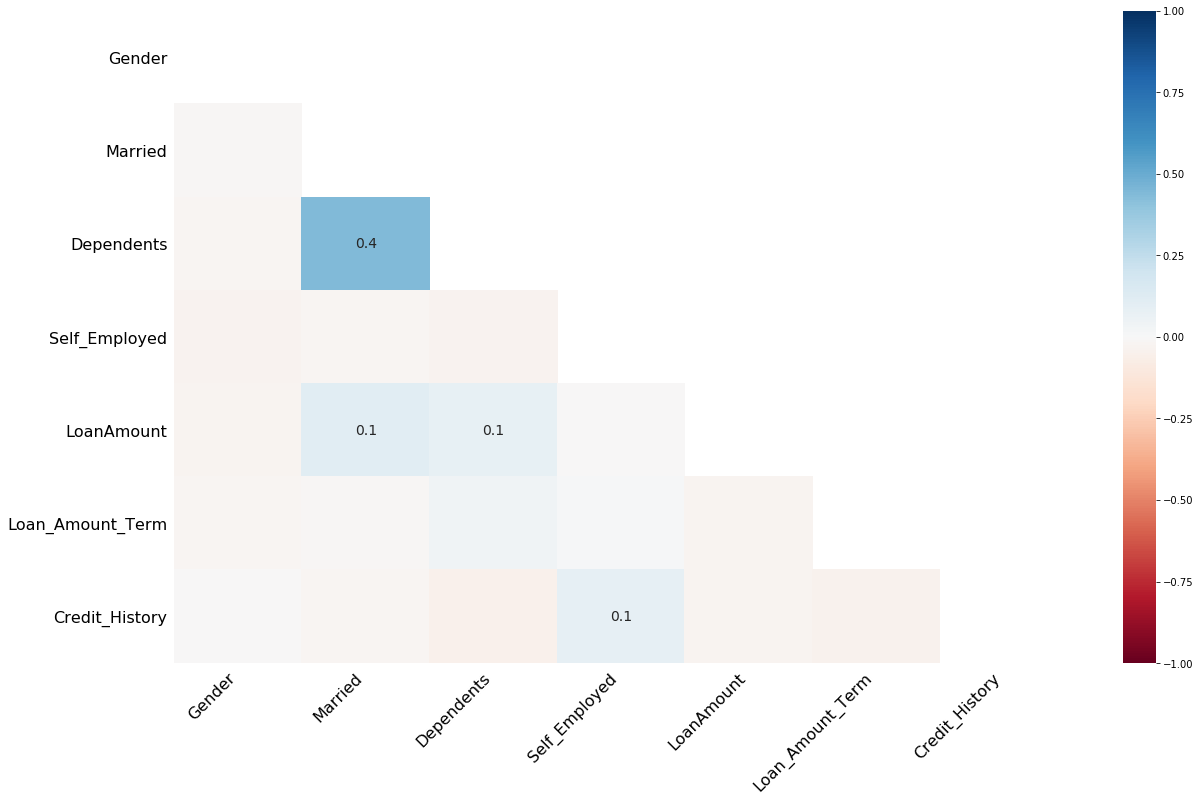

In [10]:
#Visualise Na values in dataframe
mn.bar(Rawdata)
mn.heatmap(Rawdata)

In [11]:
#Categorical data (Checking zeros proportions and class imbalance)
(Rawdata['Gender'].value_counts()/Rawdata['Gender'].count())*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

In [12]:
(Rawdata['Married'].value_counts()/Rawdata['Married'].count())*100

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

In [13]:
(Rawdata['Education'].value_counts()/Rawdata['Education'].count())*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

In [14]:
(Rawdata['Self_Employed'].value_counts()/Rawdata['Self_Employed'].count())*100

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

In [15]:
(Rawdata['Credit_History'].value_counts()/Rawdata['Credit_History'].count())*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

In [16]:
(Rawdata['Property_Area'].value_counts()/Rawdata['Property_Area'].count())*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

In [17]:
(Rawdata['Loan_Status'].value_counts()/Rawdata['Loan_Status'].count())*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [18]:
(Rawdata['Dependents'].value_counts()/Rawdata['Dependents'].count())*100
Rawdata['Credit_History'] = ["1" if x ==1.0 else "0" if x==0.0 else None for x in Rawdata['Credit_History']]

In [19]:
#Adding isna column to data set
isna_gender=Rawdata['Gender'].isna()
isna_married=Rawdata['Married'].isna()
isna_dependents=Rawdata['Dependents'].isna()
isna_selfemployed=Rawdata['Self_Employed'].isna()
isna_credit=Rawdata['Credit_History'].isna()

In [20]:
Rawdata['isna_gender']=isna_gender
Rawdata['isna_married']=isna_married
Rawdata['isna_dependents']=isna_dependents
Rawdata['isna_selfemployed']=isna_credit
Rawdata['isna_credit']=isna_credit

In [21]:
#Test data

Testdata=pd.read_csv("C:\\Users\\priti\\Desktop\\Anand\\Analytics Vidhya\\Loan prediction\\test_lAUu6dG.csv")
Sample_Submission=Testdata['Loan_ID']
Sample_Submission=pd.DataFrame(Sample_Submission)
Testdata.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [22]:
#Data Preprocessing

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

Rawdata = DataFrameImputer().fit_transform(Rawdata)

In [23]:
Rawdata.head(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,isna_gender,isna_married,isna_dependents,isna_selfemployed,isna_credit
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1,Urban,Y,False,False,False,False,False
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural,N,False,False,False,False,False
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1,Urban,Y,False,False,False,False,False
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1,Urban,Y,False,False,False,False,False
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1,Urban,Y,False,False,False,False,False
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1,Urban,Y,False,False,False,False,False
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1,Urban,Y,False,False,False,False,False
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0,Semiurban,N,False,False,False,False,False
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1,Urban,Y,False,False,False,False,False
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1,Semiurban,N,False,False,False,False,False


In [24]:
Rawdata=Rawdata.drop(['Loan_ID'],axis=1)

Rawdata['Gender']=Rawdata['Gender'].astype('category')
Rawdata['Married']=Rawdata['Married'].astype('category')
Rawdata['Dependents']=Rawdata['Dependents'].astype('category')
Rawdata['Education']=Rawdata['Education'].astype('category')
Rawdata['Self_Employed']=Rawdata['Self_Employed'].astype('category')
Rawdata['Property_Area']=Rawdata['Property_Area'].astype('category')
Rawdata['Loan_Status']=Rawdata['Loan_Status'].astype('category')
Rawdata['isna_gender']=Rawdata['isna_gender'].astype('category')
Rawdata['isna_married']=Rawdata['isna_married'].astype('category')
Rawdata['isna_dependents']=Rawdata['isna_dependents'].astype('category')
Rawdata['isna_selfemployed']=Rawdata['isna_selfemployed'].astype('category')

Rawdata['Gender']=Rawdata.Gender.cat.codes
Rawdata['Married']=Rawdata.Married.cat.codes
Rawdata['Dependents']=Rawdata.Dependents.cat.codes
Rawdata['Education']=Rawdata.Education.cat.codes
Rawdata['Self_Employed']=Rawdata.Self_Employed.cat.codes
Rawdata['Property_Area']=Rawdata.Property_Area.cat.codes
Rawdata['Loan_Status']=Rawdata.Loan_Status.cat.codes
Rawdata['isna_gender']=Rawdata.isna_gender.cat.codes
Rawdata['isna_married']=Rawdata.isna_married.cat.codes
Rawdata['isna_dependents']=Rawdata.isna_dependents.cat.codes
Rawdata['isna_selfemployed']=Rawdata.isna_selfemployed.cat.codes

In [25]:
Rawdata['isna_credit']=Rawdata['isna_credit'].astype('category')
Rawdata['isna_credit']=Rawdata.isna_credit.cat.codes

In [26]:
Rawdata['Credit_History']=Rawdata['Credit_History'].astype(int)

In [27]:
Rawdata.dtypes

Gender                  int8
Married                 int8
Dependents              int8
Education               int8
Self_Employed           int8
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area           int8
Loan_Status             int8
isna_gender             int8
isna_married            int8
isna_dependents         int8
isna_selfemployed       int8
isna_credit             int8
dtype: object

In [28]:
Rawdata.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,isna_gender,isna_married,isna_dependents,isna_selfemployed,isna_credit
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1,0,0,0,0,0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,0,0,0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,0,0,0,0,0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,0,0,0,0,0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,0,0,0,0,0


In [29]:
Check_Area = Rawdata.loc[(Rawdata['Property_Area'] == 0) | (Rawdata['Property_Area'] == 1)]
Check_Area.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,isna_gender,isna_married,isna_dependents,isna_selfemployed,isna_credit
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0,0,0,0,0,0
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0,1,0,0,0,0,0,0
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1,1,0,0,0,0,0,0
13,1,0,0,0,0,1853,2840.0,114.0,360.0,1,0,0,0,0,0,0,0
18,1,1,0,1,0,4887,0.0,133.0,360.0,1,0,0,0,0,0,0,0
22,1,1,0,1,0,2600,1911.0,116.0,360.0,0,1,0,0,0,0,0,0
23,1,1,2,1,0,3365,1917.0,112.0,360.0,0,0,0,1,0,0,0,0
24,1,1,1,0,0,3717,2925.0,151.0,360.0,1,1,0,0,0,0,1,1
25,1,1,0,0,1,9560,0.0,191.0,360.0,1,1,1,0,0,0,0,0
26,1,1,0,0,0,2799,2253.0,122.0,360.0,1,1,1,0,0,0,0,0


In [30]:
Check_Area_rural=Rawdata.loc[(Rawdata['Property_Area'] == 0)]

In [31]:
Check_Area_rural.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,isna_gender,isna_married,isna_dependents,isna_selfemployed,isna_credit
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,0,0,0,0,0
13,1,0,0,0,0,1853,2840.0,114.000000,360.0,1,0,0,0,0,0,0,0
18,1,1,0,1,0,4887,0.0,133.000000,360.0,1,0,0,0,0,0,0,0
23,1,1,2,1,0,3365,1917.0,112.000000,360.0,0,0,0,1,0,0,0,0
32,1,0,1,0,1,4692,0.0,106.000000,360.0,1,0,0,0,0,0,0,0
34,1,0,3,0,0,12500,3000.0,320.000000,360.0,1,0,0,0,0,0,0,0
57,1,1,0,0,0,3366,2200.0,135.000000,360.0,1,0,0,0,0,0,0,0
62,1,1,0,1,1,2609,3449.0,165.000000,180.0,0,0,0,0,0,0,0,0
63,1,1,1,0,0,4945,0.0,146.412162,360.0,0,0,0,0,0,0,0,0
107,1,0,0,1,0,7333,0.0,120.000000,360.0,1,0,0,0,0,0,0,0


In [32]:
(Check_Area_rural['Loan_Status'].value_counts()/Check_Area_rural['Loan_Status'].count())*100
#64% of customer are not given loan if they have property Rural

1    61.452514
0    38.547486
Name: Loan_Status, dtype: float64

In [33]:
Check_Credit_0=Rawdata.loc[(Rawdata['Credit_History'] == 0)]

In [34]:
(Check_Credit_0['Loan_Status'].value_counts()/Check_Credit_0['Loan_Status'].count())*100
#92% of customer are not given if they have Credit 0

0    92.134831
1     7.865169
Name: Loan_Status, dtype: float64

In [35]:
Check_area_credit=Rawdata.loc[(Rawdata['Credit_History']==0) & ((Rawdata['Property_Area'] == 0) | (Rawdata['Property_Area'] == 1))]

In [36]:
(Check_area_credit['Loan_Status'].value_counts()/Check_area_credit['Loan_Status'].count())*100
#89% of customers are not given load if property area is rural/semirural and credit is 0

0    89.655172
1    10.344828
Name: Loan_Status, dtype: float64

In [37]:
Check_arearural_credit=Rawdata.loc[(Rawdata['Credit_History']==0) & (Rawdata['Property_Area'] == 0)]

In [38]:
(Check_arearural_credit['Loan_Status'].value_counts()/Check_arearural_credit['Loan_Status'].count())*100

0    92.857143
1     7.142857
Name: Loan_Status, dtype: float64

In [39]:
Check_isnacredit=Rawdata.loc[(Rawdata['isna_credit']==0) & ((Rawdata['Property_Area'] == 0)|(Rawdata['Property_Area'] == 1))]

In [40]:
(Check_isnacredit['Loan_Status'].value_counts()/Check_isnacredit['Loan_Status'].count())*100

1    70.157068
0    29.842932
Name: Loan_Status, dtype: float64

In [41]:
Check_isnacredit.head(15)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,isna_gender,isna_married,isna_dependents,isna_selfemployed,isna_credit
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0,0,0,0,0,0
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0,1,0,0,0,0,0,0
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1,1,0,0,0,0,0,0
13,1,0,0,0,0,1853,2840.0,114.0,360.0,1,0,0,0,0,0,0,0
18,1,1,0,1,0,4887,0.0,133.0,360.0,1,0,0,0,0,0,0,0
22,1,1,0,1,0,2600,1911.0,116.0,360.0,0,1,0,0,0,0,0,0
23,1,1,2,1,0,3365,1917.0,112.0,360.0,0,0,0,1,0,0,0,0
25,1,1,0,0,1,9560,0.0,191.0,360.0,1,1,1,0,0,0,0,0
26,1,1,0,0,0,2799,2253.0,122.0,360.0,1,1,1,0,0,0,0,0
29,0,0,2,0,0,3750,2083.0,120.0,360.0,1,1,1,0,0,0,0,0


In [42]:
Check_areaurban_credit=Rawdata.loc[(Rawdata['Credit_History']==1) & (Rawdata['Property_Area'] == 2)]

In [43]:
(Check_areaurban_credit['Loan_Status'].value_counts()/Check_areaurban_credit['Loan_Status'].count())*100

1    77.192982
0    22.807018
Name: Loan_Status, dtype: float64

In [44]:
ls=[]
for i,j in zip(Rawdata['Credit_History'],Rawdata['Property_Area']):
    if (i==1 and j==2):
        ls.append(1)
    elif i==0:
        ls.append(0)
    else:
        ls.append(2)

In [45]:
Rawdata['Credit_Area']=pd.DataFrame(ls)

In [46]:
Rawdata=Rawdata[['Gender','isna_gender','Married','isna_married','Dependents','isna_dependents','Education','Self_Employed','isna_selfemployed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','isna_credit','Property_Area','Credit_Area','Loan_Status']]

In [47]:
Rawdata.head(25)

,Gender,isna_gender,Married,isna_married,Dependents,isna_dependents,Education,Self_Employed,isna_selfemployed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,isna_credit,Property_Area,Credit_Area,Loan_Status
0,1,0,0,0,0,0,0,0,0,5849,0.0,146.412162,360.0,1,0,2,1,1
1,1,0,1,0,1,0,0,0,0,4583,1508.0,128.000000,360.0,1,0,0,2,0
2,1,0,1,0,0,0,0,1,0,3000,0.0,66.000000,360.0,1,0,2,1,1
3,1,0,1,0,0,0,1,0,0,2583,2358.0,120.000000,360.0,1,0,2,1,1
4,1,0,0,0,0,0,0,0,0,6000,0.0,141.000000,360.0,1,0,2,1,1
5,1,0,1,0,2,0,0,1,0,5417,4196.0,267.000000,360.0,1,0,2,1,1
6,1,0,1,0,0,0,1,0,0,2333,1516.0,95.000000,360.0,1,0,2,1,1
7,1,0,1,0,3,0,0,0,0,3036,2504.0,158.000000,360.0,0,0,1,0,0
8,1,0,1,0,2,0,0,0,0,4006,1526.0,168.000000,360.0,1,0,2,1,1
9,1,0,1,0,1,0,0,0,0,12841,10968.0,349.000000,360.0,1,0,1,2,0


In [48]:
#Test data PreProcessing
Testdata['Credit_History'] = ["1" if x ==1.0 else "0" if x==0.0 else None for x in Testdata['Credit_History']]

#Adding isna column to data set
isna_gender=Testdata['Gender'].isna()
isna_married=Testdata['Married'].isna()
isna_dependents=Testdata['Dependents'].isna()
isna_selfemployed=Testdata['Self_Employed'].isna()
isna_credit=Testdata['Credit_History'].isna()

Testdata['isna_gender']=isna_gender
Testdata['isna_married']=isna_married
Testdata['isna_dependents']=isna_dependents
Testdata['isna_selfemployed']=isna_credit
Testdata['isna_credit']=isna_credit

In [49]:
Testdata = DataFrameImputer().fit_transform(Testdata)

In [50]:
Testdata=Testdata.drop(['Loan_ID'],axis=1)

Testdata['Gender']=Testdata['Gender'].astype('category')
Testdata['Married']=Testdata['Married'].astype('category')
Testdata['Dependents']=Testdata['Dependents'].astype('category')
Testdata['Education']=Testdata['Education'].astype('category')
Testdata['Self_Employed']=Testdata['Self_Employed'].astype('category')
Testdata['Property_Area']=Testdata['Property_Area'].astype('category')
Testdata['isna_gender']=Testdata['isna_gender'].astype('category')
Testdata['isna_married']=Testdata['isna_married'].astype('category')
Testdata['isna_dependents']=Testdata['isna_dependents'].astype('category')
Testdata['isna_selfemployed']=Testdata['isna_selfemployed'].astype('category')

Testdata['Gender']=Testdata.Gender.cat.codes
Testdata['Married']=Testdata.Married.cat.codes
Testdata['Dependents']=Testdata.Dependents.cat.codes
Testdata['Education']=Testdata.Education.cat.codes
Testdata['Self_Employed']=Testdata.Self_Employed.cat.codes
Testdata['Property_Area']=Testdata.Property_Area.cat.codes
Testdata['isna_gender']=Testdata.isna_gender.cat.codes
Testdata['isna_married']=Testdata.isna_married.cat.codes
Testdata['isna_dependents']=Testdata.isna_dependents.cat.codes
Testdata['isna_selfemployed']=Testdata.isna_selfemployed.cat.codes

In [51]:
Testdata['isna_credit']=Testdata['isna_credit'].astype('category')
Testdata['isna_credit']=Testdata.isna_credit.cat.codes
Testdata['Credit_History']=Testdata['Credit_History'].astype(int)

In [52]:
ls=[]
for i,j in zip(Testdata['Credit_History'],Testdata['Property_Area']):
    if (i==1 and j==2):
        ls.append(1)
    elif i==0:
        ls.append(0)
    else:
        ls.append(2)

In [53]:
Testdata['Credit_Area']=pd.DataFrame(ls)

In [54]:
Testdata=Testdata[['Gender','isna_gender','Married','isna_married','Dependents','isna_dependents','Education','Self_Employed','isna_selfemployed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','isna_credit','Property_Area','Credit_Area']]

In [55]:
Testdata=Testdata.drop(["isna_gender"],axis=1)
Testdata=Testdata.drop(["isna_married"],axis=1)
Testdata=Testdata.drop(["isna_credit"],axis=1)
Testdata=Testdata.drop(["Credit_Area"],axis=1)

In [56]:
#Visualizations 

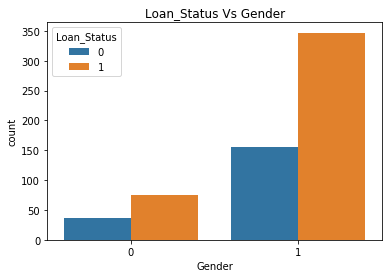

In [57]:
sns.countplot(x='Gender',hue='Loan_Status',data=Rawdata)
plt.title("Loan_Status Vs Gender")
plt.show()

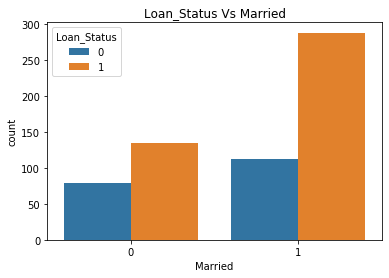

In [58]:
sns.countplot(x='Married',hue='Loan_Status',data=Rawdata)
plt.title("Loan_Status Vs Married")
plt.show()

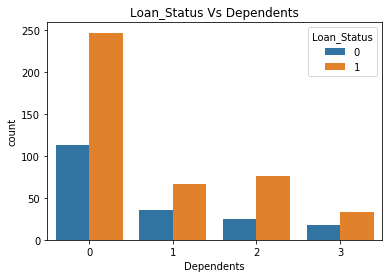

In [59]:
sns.countplot(x='Dependents',hue='Loan_Status',data=Rawdata)
plt.title("Loan_Status Vs Dependents")
plt.show()

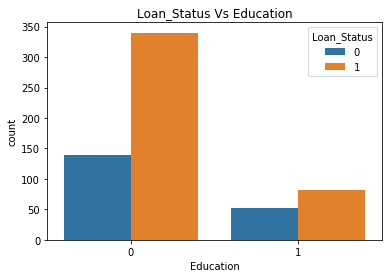

In [60]:
sns.countplot(x='Education',hue='Loan_Status',data=Rawdata)
plt.title("Loan_Status Vs Education")
plt.show()

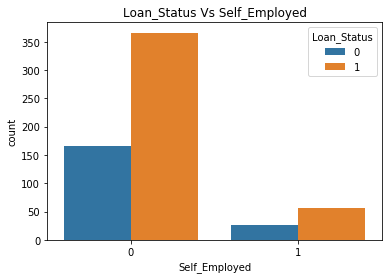

In [61]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=Rawdata)
plt.title("Loan_Status Vs Self_Employed")
plt.show()

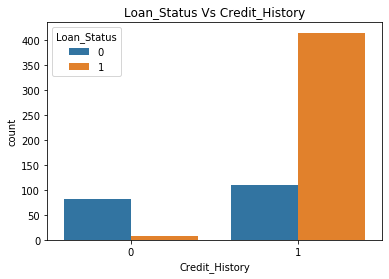

In [62]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=Rawdata)
plt.title("Loan_Status Vs Credit_History")
plt.show()

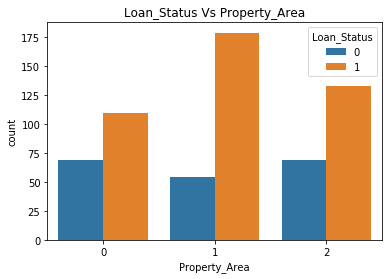

In [63]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=Rawdata)
plt.title("Loan_Status Vs Property_Area")
plt.show()

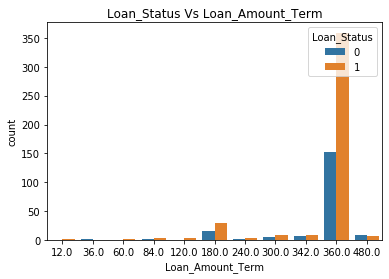

In [64]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=Rawdata)
plt.title("Loan_Status Vs Loan_Amount_Term")
plt.show()

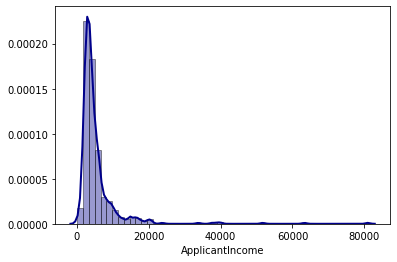

In [65]:
sns.distplot(Rawdata['ApplicantIncome'],hist=True,kde=True,hist_kws={'edgecolor':'black'},color='darkblue',kde_kws={'linewidth': 2})

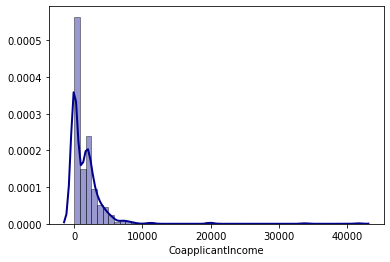

In [66]:
sns.distplot(Rawdata['CoapplicantIncome'],hist=True,kde=True,hist_kws={'edgecolor':'black'},color='darkblue',kde_kws={'linewidth': 2})

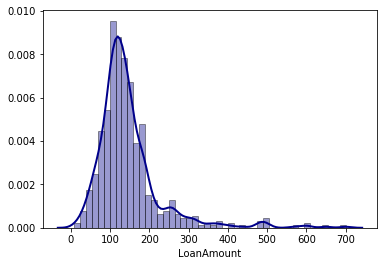

In [67]:
sns.distplot(Rawdata['LoanAmount'],hist=True,kde=True,hist_kws={'edgecolor':'black'},color='darkblue',kde_kws={'linewidth': 2})

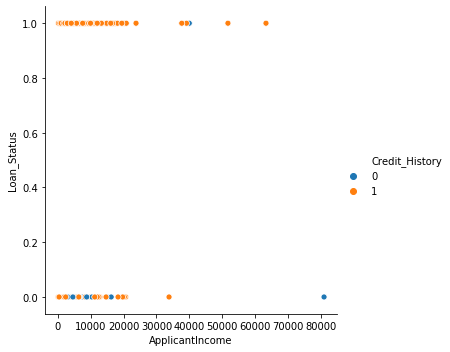

In [68]:
sns.relplot(x='ApplicantIncome',y='Loan_Status',hue='Credit_History',data=Rawdata)

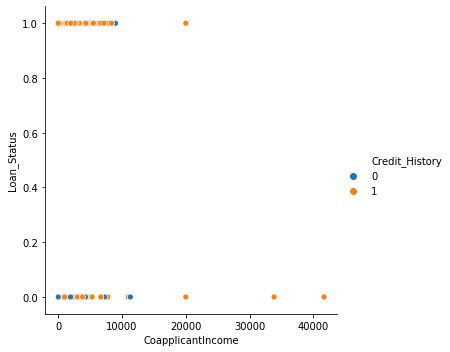

In [69]:
sns.relplot(x='CoapplicantIncome',y='Loan_Status',hue='Credit_History',data=Rawdata)

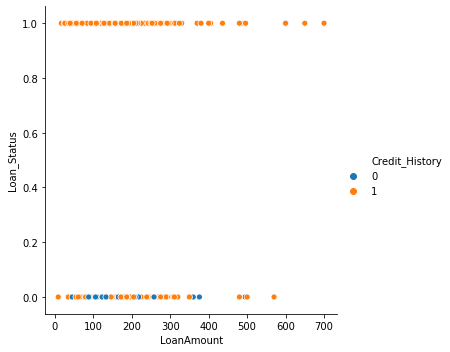

In [70]:
sns.relplot(x='LoanAmount',y='Loan_Status',hue='Credit_History',data=Rawdata)

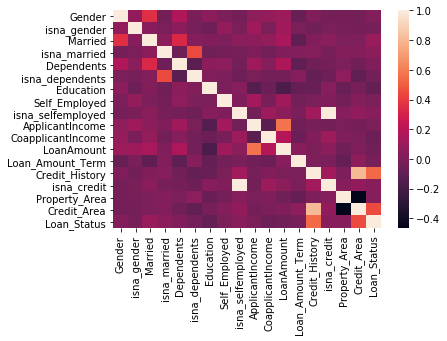

In [71]:
Correlation=Rawdata.corr()
sns.heatmap(Correlation,xticklabels=Correlation.columns,yticklabels=Correlation.columns)

[0.01573985 0.00711893 0.02899474 0.00104931 0.05553306 0.00363503
 0.0173572  0.02047994 0.00659442 0.17516581 0.11563072 0.16432526
 0.05175038 0.17809204 0.00636722 0.03445956 0.11770654]


C:\Users\priti\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


([<matplotlib.axis.XTick at 0x60dcbfa588>,
 <a list of 17 Text xticklabel objects>)

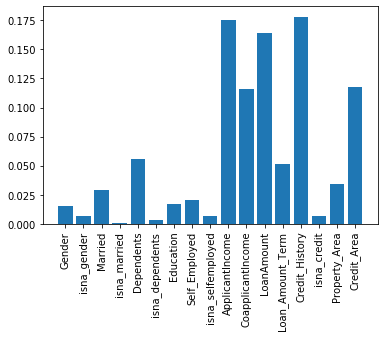

In [72]:
#FEATURE SELECTION

#ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
X=Rawdata.iloc[:,0:17]
Y=Rawdata.iloc[:,-1]
Y=pd.DataFrame(Y)
Model_ETC=ExtraTreesClassifier(n_estimators=10)
Model_ETC.fit(X,Y)
print(Model_ETC.feature_importances_)
N=17
ind=np.arange(N)
plt.bar(range(len(Model_ETC.feature_importances_)),Model_ETC.feature_importances_)
plt.xticks(ind,('Gender','isna_gender','Married','isna_married','Dependents','isna_dependents','Education','Self_Employed','isna_selfemployed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','isna_credit','Property_Area','Credit_Area'),rotation='vertical')


C:\Users\priti\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priti\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.02643519 0.         0.04007125 0.         0.03800073 0.02404134
 0.05683545 0.03785449 0.04570435 0.03806263 0.04507047 0.03858724
 0.04812954 0.49582598 0.         0.0418929  0.0234884 ]


([<matplotlib.axis.XTick at 0x60dd11be88>,
 <a list of 17 Text xticklabel objects>)

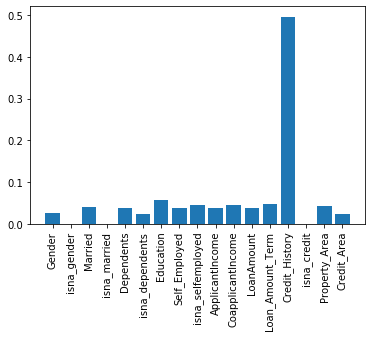

In [73]:
#XGB for feature selection
from xgboost import XGBClassifier
Model_XGB=XGBClassifier()
Model_XGB.fit(X,Y)
print(Model_XGB.feature_importances_)
plt.bar(range(len(Model_XGB.feature_importances_)),Model_XGB.feature_importances_)
plt.xticks(ind,('Gender','isna_gender','Married','isna_married','Dependents','isna_dependents','Education','Self_Employed','isna_selfemployed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','isna_credit','Property_Area','Credit_Area'),rotation='vertical')


In [74]:
Rawdata=Rawdata.drop(["isna_gender"],axis=1)
Rawdata=Rawdata.drop(["isna_married"],axis=1)
Rawdata=Rawdata.drop(["isna_credit"],axis=1)
Rawdata=Rawdata.drop(["Credit_Area"],axis=1)

In [75]:
X=Rawdata.iloc[:,0:13]
Y=Rawdata.iloc[:,-1]
Y=pd.DataFrame(Y)

In [76]:
#Using XGBoost
data_dmatrix = xgb.DMatrix(data=X,label=Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100,shuffle=True)
Model_XGB.fit(X_train,Y_train)
print(Model_XGB)
#Train pedictions
X_pred=Model_XGB.predict(X_train)
XGB_predictions_train = [round(value) for value in X_pred]
accuracy_XGB_train = accuracy_score(Y_train, XGB_predictions_train)
print("Accuracy: %.2f%%" % (accuracy_XGB_train * 100.0))
#Train accuracy=100%
#Test predictions
Y_pred=Model_XGB.predict(X_test)
XGB_predictions = [round(value) for value in Y_pred]
# Evaluate predictions
accuracy_XGB = accuracy_score(Y_test, XGB_predictions)
print("Accuracy: %.2f%%" % (accuracy_XGB * 100.0))
confusion_matrix(Y_test,XGB_predictions)
matrix = classification_report(Y_test,XGB_predictions)
print(matrix)
#Test accuracy_XGB=69.92%

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 100.00%
Accuracy: 72.36%
              precision    recall  f1-score   support

           0       0.72      0.48      0.57        48
           1       0.73      0.88      0.80        75

    accuracy                           0.72       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.72      0.72      0.71       123



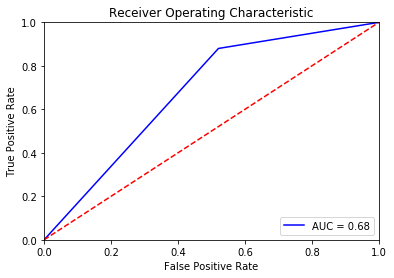

In [77]:
#ROC of XGB model
fpr_xgb, tpr_xgb, threshold_xgb = roc_curve(Y_test, XGB_predictions)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_xgb, tpr_xgb, 'b', label = 'AUC = %0.2f' % roc_auc_xgb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [78]:
# Random forest algorithm for classification
Model_RF = RandomForestClassifier(n_estimators=100)
Model_RF.fit(X_train, Y_train)
RF_predictions= Model_RF.predict(X_train)
print("Accuracy:",accuracy_score(Y_train,RF_predictions)*100)
#Accuracy_RF_train=100%
RF_predictions_test=Model_RF.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,RF_predictions_test)*100)
#Accuracy_RF_test=70%
print(confusion_matrix(Y_test,RF_predictions_test))
print(classification_report(Y_test, RF_predictions_test))
RF_CV_score = cross_val_score(Model_RF, X, Y, cv=10, scoring='accuracy')
print(RF_CV_score)
print("Accuracy:", np.mean(RF_CV_score)*100)
#AUC_RF_CV=77.7

C:\Users\priti\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 100.0
Accuracy: 75.60975609756098
[[23 25]
 [ 5 70]]
              precision    recall  f1-score   support

           0       0.82      0.48      0.61        48
           1       0.74      0.93      0.82        75

    accuracy                           0.76       123
   macro avg       0.78      0.71      0.71       123
weighted avg       0.77      0.76      0.74       123



C:\Users\priti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\priti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\priti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\priti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

[0.77419355 0.77419355 0.72580645 0.72580645 0.78688525 0.78688525
 0.85245902 0.75409836 0.78688525 0.81967213]
Accuracy: 77.86885245901638


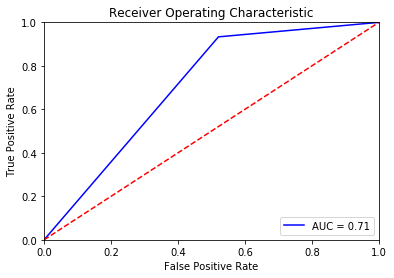

In [79]:
#ROC Curve of Random forest model
fpr_RF, tpr_RF, threshold_RF = roc_curve(Y_test, RF_predictions_test)
roc_auc_RF = auc(fpr_RF, tpr_RF)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
#Light_GradientBoostingMethod
Model_LGBM=LGBMClassifier()
CV_LGBM=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=100)
Score_LGBM=cross_val_score(Model_LGBM,X,Y,scoring='accuracy',cv=CV_LGBM,n_jobs=-1,error_score='raise')
print('Accuracy: %.3f' % (np.mean(Score_LGBM)*100))
#Accuracy_LGBM_CV=77.191%
Model_LGBM.fit(X_train,Y_train)
LGBM_pred_train=Model_LGBM.predict(X_train)
print("Accuracy_train_LGBM:",accuracy_score(Y_train,LGBM_pred_train)*100)
#Accuracy_LGBM_train=98.77%%
LGBM_pred_test=Model_LGBM.predict(X_test)
print("Accuracy_train_LGBM:",accuracy_score(Y_test,LGBM_pred_test)*100)
#ACCuracy_LGBM_test=73.17%

Accuracy: 77.351
Accuracy_train_LGBM: 98.77800407331976
Accuracy_train_LGBM: 73.98373983739837


C:\Users\priti\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priti\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


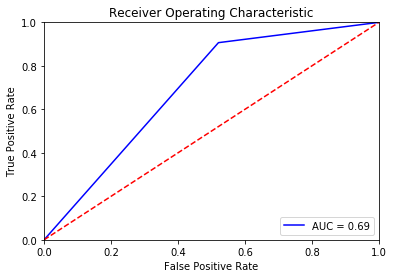

In [81]:
#ROC Curve of Light_GradientBoosting 
fpr_LGBM, tpr_LGBM, threshold_LGBM = roc_curve(Y_test, LGBM_pred_test)
roc_auc_LGBM = auc(fpr_LGBM, tpr_LGBM)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_LGBM, tpr_LGBM, 'b', label = 'AUC = %0.2f' % roc_auc_LGBM)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
#Navie Bayes
Model_gnb = GaussianNB()
Model_gnb.fit(X_train, Y_train)
gnb_predictions= Model_gnb.predict(X_train)
print("Accuracy:",accuracy_score(Y_train,gnb_predictions)*100)
#Train_accuracy_GNB=81.67%
gnb_predictions_test= Model_gnb.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,gnb_predictions_test)*100)
#Test_accuracy_test=73.17%
CV_NB=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=100)
Score_NB=cross_val_score(Model_gnb,X,Y,scoring='accuracy',cv=CV_NB,n_jobs=-1,error_score='raise')
print('Accuracy: %.3f ' % (np.mean(Score_NB)*100))
#Accuracy_CV_gnb=79.59%

C:\Users\priti\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 81.87372708757637
Accuracy: 73.17073170731707
Accuracy: 79.265 


In [96]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('xgb', XGBClassifier(n=100)))
    level0.append(('rf', RandomForestClassifier(n=100)))
    level0.append(('lgb', LGBMClassifier()))
    level0.append(('bayes', GaussianNB()))
    level0.append(('svm', SVC()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('ada', AdaBoostClassifier(n=100)))
    level0.append(('bag', BaggingClassifier(n=100)))
    level0.append(('etc', ExtraTreesClassifier(n=100)))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=4)
    return model

In [84]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['xgb'] = XGBClassifier()
    models['rf'] = RandomForestClassifier()
    models['lgb'] = LGBMClassifier()
    models['bayes'] = GaussianNB()
    models['svm'] = SVC()
    models['cart'] = DecisionTreeClassifier()
    models['ada'] = AdaBoostClassifier()
    models['bag'] = BaggingClassifier()
    models['etc'] = ExtraTreesClassifier()
    models['stacking'] = get_stacking()
    return models

In [85]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, Y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>stacking 0.795 (0.040)


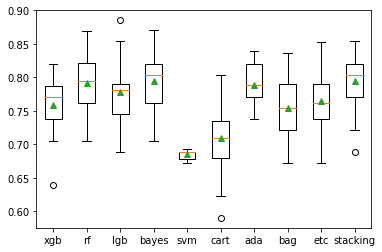

In [91]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [98]:
# define the base models
level0 = list()
level0.append(('xgb', XGBClassifier()))
level0.append(('rf', RandomForestClassifier()))
level0.append(('lgb', LGBMClassifier()))
level0.append(('bayes', GaussianNB()))
level0.append(('svm', SVC()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('ada', AdaBoostClassifier()))
level0.append(('bag', BaggingClassifier()))
level0.append(('etc', ExtraTreesClassifier()))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=4)
# fit the model on all available data
model.fit(X, Y)

C:\Users\priti\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priti\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingClassifier(cv=4,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                      

In [99]:
#Predicting Test data
Testdata_pred= model.predict(Testdata)

In [100]:
Sample_Submission['Loan_Status']=Testdata_pred
Sample_Submission['Loan_Status'] = ['Y' if x ==1 else 'N' if x==0 else None for x in Sample_Submission['Loan_Status']] 

Sample_Submission.to_csv(r'C:\Users\priti\Desktop\Anand\Analytics Vidhya\Loan prediction\Sample_Submission.csv',index=False)